In [1]:
import numpy as np
import networkx as nx
# import tensorflow as tf
import math

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# from tensorflow.keras import Sequential, Model
# from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Embedding
from matplotlib.lines import Line2D
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
def read_results_txt_file(filename, n_a, n_b):
        #c_a = 'red'
        #c_b = 'blue'
        c_a = '1'
        c_b = '0'
        #n_a = np.sum([1 if v['color'] == c_a else 0 for _, v in self.G.nodes.items()])
        #n_b = np.sum([1 if v['color'] == c_b else 0 for _, v in self.G.nodes.items()])

        with open(filename, 'r') as f:
            inf_a, inf_b = [], []
            for line in f:
                s = line.split()

                if s[1] == c_a and s[3] == c_b:
                    inf_a.append(float(s[2]))
                    inf_b.append(float(s[4]))
                elif s[1] == c_b and s[3] == c_a:
                    inf_b.append(float(s[2]))
                    inf_a.append(float(s[4]))
                else:
                    raise Exception('wrong format')

        inf_a, inf_b = np.array(inf_a), np.array(inf_b)
        total_fraction = 100 * (inf_a + inf_b) / (n_a + n_b)
        #diff_fraction = np.abs( (100 * inf_a / n_a) - (100 * inf_b / n_b) )
        var_fraction = np.var(np.concatenate([(100 * inf_a / n_a).reshape([-1,1]) , 
                                              (100 * inf_b / n_b).reshape([-1,1])], axis=1), axis=1)

        frac_a = 100 * inf_a / n_a
        frac_b = 100 * inf_b / n_b
    
        return np.concatenate([np.array(total_fraction).reshape([-1,1]),
                np.array(frac_a).reshape([-1,1]),
                np.array(frac_b).reshape([-1,1]),
                #np.array(diff_fraction).reshape([-1,1])], axis=1)
                np.array(var_fraction).reshape([-1,1])], axis=1)

    
def read_avg_results_txt_file(filename, n_a, n_b):
    res = []
    for i in ['_1', '_2', '_3', '_4', '_5']:
        res.append(read_results_txt_file(filename + i + '_results.txt', n_a, n_b))

    print(res[0].shape, ' ', res[1].shape)
        
    adv = np.mean( np.concatenate([np.expand_dims(a, 2) for a in res], axis = 2), axis = 2)
    return adv    

In [3]:
n_a = 350
n_b = 150

bndry = '0.7'
exp_ = '4.0'
Phet = '0.001'

tmp_filename = '../influence_maximization/results/synth2/synthetic_n500_Pred0.7_Phom0.025_Phet' + Phet + '_Pact0.03' 

#filename = tmp_filename + '_emb_random_walk_5_bndry_' + bndry + '_exp_' + exp_ + '_d32_results.txt'
filename = tmp_filename + '_emb_random_walk_5_bndry_' + bndry + '_exp_' + exp_ + '_d32'
rice_rw_method = read_avg_results_txt_file(filename, n_a, n_b)
# rice_rw_method = read_results_txt_file(filename + '_results.txt', n_a, n_b)

filename = tmp_filename + '_greedy__results.txt'
rice_greedy = read_results_txt_file(filename, n_a, n_b)

#filename = tmp_filename + '_emb_unweighted_d32_results.txt'
#rice_unweighted = read_results_txt_file(filename, n_a, n_b)
filename = tmp_filename + '_emb_unweighted_d32'
rice_unweighted = read_avg_results_txt_file(filename, n_a, n_b)

filename = '../influence_maximization/results/synth2/synthetic_n500_Pred0.7_Phom0.025_Phet0.001_Pact0.03_emb_random_walk_5_bndry_' + '0.5' + '_exp_' + '0.0' + '_d32'
fairwalk = read_avg_results_txt_file(filename, n_a, n_b)

########################################

uw = np.array([0.2341, rice_unweighted[-1,0], rice_unweighted[-1,3]])

filename = '../influence_maximization/results/synth2/synthetic_n500_Pred0.7_Phom0.025_Phet0.001_Pact0.03_emb_random_walk_5_bndry_' + '0.3' + '_exp_' + '4.0' + '_d32'
tmp = read_avg_results_txt_file(filename, n_a, n_b)
alpha0_3_p_4 = np.array([0.0265, tmp[-1,0], tmp[-1,3]])

filename = '../influence_maximization/results/synth2/synthetic_n500_Pred0.7_Phom0.025_Phet0.001_Pact0.03_emb_random_walk_5_bndry_' + '0.5' + '_exp_' + '4.0' + '_d32'
tmp = read_avg_results_txt_file(filename, n_a, n_b)
alpha0_5_p_4 = np.array([0.0160, tmp[-1,0], tmp[-1,3]])

filename = '../influence_maximization/results/synth2/synthetic_n500_Pred0.7_Phom0.025_Phet0.001_Pact0.03_emb_random_walk_5_bndry_' + '0.7' + '_exp_' + '4.0' + '_d32'
tmp = read_avg_results_txt_file(filename, n_a, n_b)
alpha0_7_p_4 = np.array([0.0137, tmp[-1,0], tmp[-1,3]])

filename = '../influence_maximization/results/synth2/synthetic_n500_Pred0.7_Phom0.025_Phet0.001_Pact0.03_emb_randomembedding_d32'
tmp = read_avg_results_txt_file(filename, n_a, n_b)
rnd = np.array([0.0085, tmp[-1,0], tmp[-1,3]])

(40, 4)   (40, 4)
(40, 4)   (40, 4)
(40, 4)   (40, 4)
(40, 4)   (40, 4)
(40, 4)   (40, 4)
(40, 4)   (40, 4)
(40, 4)   (40, 4)


In [4]:
adv_1 = np.array([
       [0.008, 0.02, 0.003, 0.017] ,
       [0.017, 0.034, 0.01, 0.024] ,
       [0.026, 0.048, 0.016, 0.032] ,
       [0.034, 0.048, 0.028, 0.02] ,
       [0.043, 0.055, 0.038, 0.017] ,
       [0.051, 0.061, 0.047, 0.013999999999999999] ,
       [0.06, 0.068, 0.056, 0.012000000000000004] ,
       [0.069, 0.076, 0.066, 0.009999999999999995] ,
       [0.077, 0.103, 0.066, 0.03699999999999999] ,
       [0.086, 0.117, 0.072, 0.04500000000000001]
])

adv_2 = np.array([
       [0.009, 0.007, 0.009, 0.001999999999999999] ,
       [0.017, 0.007, 0.022, 0.015] ,
       [0.026, 0.014, 0.031, 0.017] ,
       [0.034, 0.021, 0.04, 0.019] ,
       [0.043, 0.021, 0.052, 0.030999999999999996] ,
       [0.051, 0.034, 0.059, 0.024999999999999994] ,
       [0.06, 0.028, 0.074, 0.046] ,
       [0.069, 0.035, 0.083, 0.048] ,
       [0.077, 0.048, 0.09, 0.041999999999999996] ,
       [0.086, 0.069, 0.093, 0.023999999999999994]
])

adv_3 = np.array([
        [0.009, 0.007, 0.009, 0.001999999999999999] ,
       [0.017, 0.028, 0.013, 0.015000000000000001] ,
       [0.026, 0.021, 0.028, 0.006999999999999999] ,
       [0.035, 0.041, 0.032, 0.009000000000000001] ,
       [0.043, 0.049, 0.041, 0.008] ,
       [0.052, 0.049, 0.053, 0.003999999999999997] ,
       [0.06, 0.063, 0.059, 0.0040000000000000036] ,
       [0.069, 0.07, 0.069, 0.0010000000000000009] ,
       [0.078, 0.069, 0.081, 0.011999999999999997] ,
       [0.086, 0.077, 0.09, 0.012999999999999998]
])

adv_4 = np.array([
     [0.009, 0.007, 0.009, 0.001999999999999999] ,
       [0.017, 0.021, 0.016, 0.005000000000000001] ,
       [0.026, 0.028, 0.025, 0.002999999999999999] ,
       [0.034, 0.056, 0.025, 0.031] ,
       [0.043, 0.048, 0.04, 0.008] ,
       [0.052, 0.069, 0.044, 0.02500000000000001] ,
       [0.06, 0.055, 0.062, 0.006999999999999999] ,
       [0.068, 0.131, 0.04, 0.091] ,
       [0.077, 0.09, 0.072, 0.018000000000000002] ,
       [0.085, 0.118, 0.071, 0.047]
])

adv_5 = np.array([
    [0.009, 0.007, 0.009, 0.001999999999999999] ,
       [0.017, 0.02, 0.015, 0.005000000000000001] ,
       [0.025, 0.034, 0.022, 0.012000000000000004] ,
       [0.034, 0.041, 0.031, 0.010000000000000002] ,
       [0.043, 0.034, 0.047, 0.012999999999999998] ,
       [0.051, 0.055, 0.05, 0.0049999999999999975] ,
       [0.06, 0.055, 0.062, 0.006999999999999999] ,
       [0.068, 0.055, 0.074, 0.018999999999999996] ,
       [0.077, 0.076, 0.077, 0.0010000000000000009] ,
       [0.086, 0.063, 0.096, 0.033]
])

# adv = np.mean( np.concatenate([np.expand_dims(a, 2) for a in 
#             [adv_1, adv_2, adv_3, adv_4, adv_5]], axis = 2), axis = 2)

tmp = np.concatenate([np.expand_dims(100 * a, 2) for a in [adv_1, adv_2, adv_3, adv_4, adv_5]], axis = 2)
for i in range(tmp.shape[2]):
    tmp[:,3,i] = np.var(tmp[:,1:3,i], axis=1)
adv = np.mean(tmp, axis=2)

In [5]:
n_seeds = np.arange(2,41,2)


red_ = '#fab3ac'
blue_ = '#29a5e3'
cyan_ = '#d2f0f7'
green_ = '#a3f77e'
gray_ = '#dbdbdb'
purple_ = '#BF55EC'
yellow_ = '#F7CA18'

In [6]:
def get_real_plots(figtype, square, fontsize, labelsize, imagesize, line_width, ylim=None, legend_size=20):

    fig, ax = plt.subplots()

    
    ind = n_seeds - 1
    if figtype == 'total':
        ax.plot(n_seeds, rice_unweighted[ind, 0], color='red', lw=line_width, label='DeepWalk')
    elif figtype == 'frac':
        ax.plot(n_seeds, rice_unweighted[ind, 1], color='red', lw=line_width, linestyle='dashed')
        ax.plot(n_seeds, rice_unweighted[ind, 2],  color='red', lw=line_width, linestyle='dotted')
        
    if figtype == 'total':
        ax.plot(n_seeds, fairwalk[ind, 0], color='green', lw=line_width, label='FairWalk')
    elif figtype == 'frac':
        ax.plot(n_seeds, fairwalk[ind, 1], color='green', lw=line_width, linestyle='dashed')
        ax.plot(n_seeds, fairwalk[ind, 2],  color='green', lw=line_width, linestyle='dotted')
        
    #n_seeds_adv = np.concatenate([np.arange(4,33,4), np.array([40])])
    n_seeds_adv = np.arange(4,41,4)
    if figtype == 'total':
        ax.plot(n_seeds_adv, adv[:, 0], color='cyan', lw=line_width, label='Adversarial')
    elif figtype == 'frac':
        ax.plot(n_seeds_adv, adv[:, 2], color='cyan', lw=line_width, linestyle='dashed')
        ax.plot(n_seeds_adv, adv[:, 1],  color='cyan', lw=line_width, linestyle='dotted')
    
    if figtype == 'total':
        ax.plot(n_seeds, rice_rw_method[ind, 0], color='blue', lw=line_width, label='SocialWalk')
    elif figtype == 'frac':
        ax.plot(n_seeds, rice_rw_method[ind, 1], color='blue', lw=line_width, linestyle='dashed')
        ax.plot(n_seeds, rice_rw_method[ind, 2],  color='blue', lw=line_width, linestyle='dotted')
    
    if figtype == 'total':
        plt.legend(loc='upper left', prop={'size': legend_size})
#     custom_lines = [Line2D([0], [0], color=red_, lw=3),
#                 Line2D([0], [0], color=green_, lw=3), 
#                 Line2D([0], [0], color=cyan_, lw=3),
#                 Line2D([0], [0], color=blue_, lw=3)]
#     legend1 = plt.legend(custom_lines, ['Greedy', 'DeepWalk', 'FairWalk', 'FairWalk++'], bbox_to_anchor=(-0.24, 1.06, 1.4, .102), loc='lower left',
#            ncol=4, mode="expand", borderaxespad=0.)
#     plt.gca().add_artist(legend1)
    
    if figtype == 'frac':
        custom_lines2 = [Line2D([0], [0], linestyle='dashed', lw=3),
                Line2D([0], [0], linestyle='dotted', lw=3)]
        legend2 = plt.legend(custom_lines2, ['Group A', 'Group B'], loc='upper left')
        plt.gca().add_artist(legend2)
    
    if ylim:
        ax.set_ylim([0, ylim])
    
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed')
    
    plt.xlabel('Number of Seeds', fontsize = labelsize)
    if figtype == 'total':
        #plt.ylabel('Fraction Influenced', fontsize = labelsize)
        plt.ylabel('Total Influence', fontsize = labelsize)
    else:
        plt.ylabel('Group Influence', fontsize = labelsize)
    plt.rcParams.update({'font.size': fontsize})
    plt.xticks(fontsize=labelsize)
    plt.yticks([3, 6, 9, 12], ['3%', '6%', '9%', '12%'], fontsize=labelsize)
    fig.set_size_inches(imagesize[0], imagesize[1]) 
    
    added_s = ''
    if not square:
        added_s = '1'
        
    if figtype == 'total':
        fig.savefig('fig/influence_maximization_synth2/synth2-total' + added_s + '.pdf',bbox_inches='tight')
    elif figtype == 'frac':
        fig.savefig('fig/influence_maximization_synth2/synth2-fractions' + added_s + '.pdf',bbox_inches='tight')
    
    
#%%

# def get_diff_plot(real, square, fontsize, labelsize, imagesize, line_width, ylim=None):
def get_var_plot(real, square, fontsize, labelsize, imagesize, line_width, ylim=None, legend_size=20):
        
    fig, ax = plt.subplots()
    
    ind = n_seeds - 1
    ax.plot(n_seeds, rice_unweighted[ind, 3], color='red', lw=line_width, label='DeepWalk')
    ax.plot(n_seeds, fairwalk[ind, 3], color='green', lw=line_width, label='FairWalk')
#     n_seeds_adv = np.concatenate([np.arange(4,33,4), np.array([40])])
    n_seeds_adv = np.arange(4,41,4)
    ax.plot(n_seeds_adv, adv[:, 3], color='cyan', lw=line_width, label='Adversarial')
    ax.plot(n_seeds, rice_rw_method[ind, 3], color='blue', lw=line_width, label='SocialWalk')
    
#     custom_lines = [Line2D([0], [0], color='red', lw=3),
#                 Line2D([0], [0], color='green', lw=3),
#                 Line2D([0], [0], color='blue', lw=3), 
#                 Line2D([0], [0], color='cyan', lw=3)]
#     legend1 = plt.legend(custom_lines, ['Greedy', 'Tsang et al.', 'Emb+K-med', 'Preproc+Emb+K-med'], bbox_to_anchor=(-0.24, 1.06, 1.4, .102), loc='lower left',
#            ncol=2, mode="expand", borderaxespad=0.)
#     plt.gca().add_artist(legend1)
    
    if ylim:
        ax.set_ylim([0, ylim])
    
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed')
    
    plt.legend(loc='upper left', prop={'size': legend_size})
    
    plt.xlabel('Number of Seeds', fontsize = labelsize)
#     plt.ylabel('Diff in Fraction Influenced', fontsize = labelsize)
    plt.ylabel('Discrepancy', fontsize = labelsize)
    plt.rcParams.update({'font.size': fontsize})
    plt.xticks(fontsize=labelsize)
    plt.yticks(fontsize=labelsize)
    fig.set_size_inches(imagesize[0], imagesize[1]) 
    
    added_s = ''
    if not square:
        added_s = '1'
    
    fig.savefig('fig/influence_maximization_synth2/synth2-diff' + added_s + '.pdf',bbox_inches='tight')


In [7]:
def get_bar_plot_all(real, bar_width, square, fontsize, labelsize, imagesize, ylim = None):
    
    
    methods = ['Gr', 'Ts', 'EmKm', 'PrEmKm']
    
    #labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
    labels = [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
    
#     xg= [xx-bar_width/2 , xx, xx+bar_width/2]
#     xp = [xx - bar_width/2, 3, 3 + bar_width/2]
#     xf = [xx - bar_width/2, 5, 5 + bar_width/2]
#     xfm = [xx - bar_width/2, 7, 7 + bar_width/2]
    
    
    
    xg = [1- bar_width, 1, 1 + bar_width]
    xa = [3 - bar_width, 3, 3 + bar_width]
    xe = [5 - bar_width, 5, 5 + bar_width]
    xp = [7 - bar_width, 7, 7 + bar_width]
    
    

    greedy = rice_greedy[-1, :3] # [0.16, 0.084,	0.18]    
    ad = adv[-1,:3]
    EmKm = rice_unweighted[-1, :3] # [0.161,	0.136, 0.168]           
    PrEmKm = rice_rw_method[-1, :3] # [0.175,	0.11, 0.194]       
    
    fig, ax = plt.subplots()
    
    ax.bar(xg[0], greedy[0], bar_width, color = red_, edgecolor='black')
    ax.bar(xa[0], ad[0], bar_width, color = cyan_, edgecolor='black')
    ax.bar(xe[0], EmKm[0], bar_width, color = green_, edgecolor='black')
    ax.bar(xp[0], PrEmKm[0], bar_width, color = blue_, edgecolor='black')
    
    ax.bar(xg[1], greedy[1], bar_width, color = red_, hatch='//', edgecolor='black')
    ax.bar(xa[1], ad[1], bar_width, color = cyan_, hatch='//', edgecolor='black')
    ax.bar(xe[1], EmKm[1], bar_width, color = green_, hatch='//', edgecolor='black')
    ax.bar(xp[1], PrEmKm[1], bar_width, color = blue_, hatch='//', edgecolor='black')
        
    ax.bar(xg[2], greedy[2], bar_width, color = red_, hatch='\\\\', edgecolor='black')
    ax.bar(xa[2], ad[2], bar_width, color = cyan_, hatch='\\\\', edgecolor='black')
    ax.bar(xe[2], EmKm[2], bar_width, color = green_, hatch='\\\\', edgecolor='black')
    ax.bar(xp[2], PrEmKm[2], bar_width, color = blue_, hatch='\\\\', edgecolor='black')
    
    ax.bar(xg[0], 0, bar_width, color = gray_, label='Total', edgecolor='black')
    ax.bar(xg[1], 0, bar_width, color = gray_, hatch='//', label='Group A', edgecolor='black')
    ax.bar(xg[2], 0, bar_width, color = gray_, hatch='\\\\', label='Group B', edgecolor='black')

    plt.legend(loc='upper left')
    
#     custom_lines = [Line2D([0], [0], color='red', lw=3),
#                     Line2D([0], [0], color='green', lw=3),
#                     Line2D([0], [0], color='blue', lw=3), 
#                     Line2D([0], [0], color='cyan', lw=3)]
#     legend1 = plt.legend(custom_lines, ['Greedy', 'Tsang et al.', 'Emb+K-med', 'Preproc+Emb+K-med'], bbox_to_anchor=(-0.24, 1.06, 1.4, .102), loc='lower left',
#                ncol=2, mode="expand", borderaxespad=0.)
#     plt.gca().add_artist(legend1)
    
#     custom_lines2 = [Line2D([0], [0], linestyle='dashed', lw=3),
#                     Line2D([0], [0], linestyle='dotted', lw=3)]
#     legend2 = plt.legend(custom_lines2, ['Group A', 'Group B'])
#     plt.gca().add_artist(legend2)
    
    if ylim:
        ax.set_ylim([0, ylim])
     
    
    
    ax.set_xticklabels(labels)
#     plt.xticks([0.6,1,1.4,2.6,3,3.4,4.6,5,5.4,6.6,7,7.4], ['Total','Group A','Group B','Total','Group A','Group B','Total','Group A','Group B','Total','Group A','Group B'], rotation=60, horizontalalignment='right', fontsize=12)
#     ax.set_axisbelow(True)
#     ax.yaxis.grid(color='gray', linestyle='dashed')
    
    plt.xlabel('Methods', fontsize = labelsize)
    plt.ylabel('Fraction Influenced', fontsize = labelsize)
    plt.rcParams.update({'font.size': fontsize})
    plt.xticks(fontsize=17)
    plt.yticks(fontsize=labelsize)
    fig.set_size_inches(imagesize[0], imagesize[1]) 
    
    added_s = ''
    if not square:
        added_s = '1'
    
    fig.savefig('fig/influence_maximization_synth2/synth2-bar' + added_s + '.pdf',bbox_inches='tight')
    

In [8]:
def get_bar_plot(real, bar_width, square, fontsize, labelsize, imagesize, ylim = None, legend_size=20):
    
    
#     methods = ['Gr', 'Ts', 'EmKm', 'PrEmKm']
    
    #labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
    labels = [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ']
    
#     xg= [xx-bar_width/2 , xx, xx+bar_width/2]
#     xp = [xx - bar_width/2, 3, 3 + bar_width/2]
#     xf = [xx - bar_width/2, 5, 5 + bar_width/2]
#     xfm = [xx - bar_width/2, 7, 7 + bar_width/2]
    
    
    
    xg = [0 - bar_width, 0]
    xu = [2 - bar_width, 2]
    xf = [4 - bar_width, 4]
    xa = [6 - bar_width, 6]
    xp = [8 - bar_width, 8]
    
    
    greedy = rice_greedy[-1, :4] # [0.16, 0.084,	0.18]    
    ad = adv[-1,:4]
    EmKm = rice_unweighted[-1, :4] # [0.161,	0.136, 0.168]
    FW = fairwalk[-1,:4]
    PrEmKm = rice_rw_method[-1, :4] # [0.175,	0.11, 0.194]       
    
    
    print(EmKm[3])
    print(FW[3])
    print(ad[3])
    print(PrEmKm[3])
    
    fig, ax = plt.subplots()
    
    ax.bar(xg[0], greedy[0], bar_width, color = purple_, edgecolor='black')
    ax.bar(xu[0], EmKm[0], bar_width, color = purple_, edgecolor='black', label='Total Influence Pcntg')
    ax.bar(xf[0], FW[0], bar_width, color = purple_, edgecolor='black')
    ax.bar(xa[0], ad[0], bar_width, color = purple_, edgecolor='black')
    ax.bar(xp[0], PrEmKm[0], bar_width, color = purple_, edgecolor='black')
    
    ax.bar(xg[1], greedy[3], bar_width, color = yellow_, edgecolor='black')
    ax.bar(xu[1], EmKm[3], bar_width, color = yellow_, edgecolor='black', label='Disparity')
    ax.bar(xf[1], FW[3], bar_width, color = yellow_, edgecolor='black')
    ax.bar(xa[1], ad[3], bar_width, color = yellow_, edgecolor='black')
    ax.bar(xp[1], PrEmKm[3], bar_width, color = yellow_, edgecolor='black')
    
#     ax.bar(xg[1], greedy[1], bar_width, color = red_, hatch='//', edgecolor='black')
#     ax.bar(xa[1], ad[1], bar_width, color = cyan_, hatch='//', edgecolor='black')
#     ax.bar(xe[1], EmKm[1], bar_width, color = green_, hatch='//', edgecolor='black')
#     ax.bar(xp[1], PrEmKm[1], bar_width, color = blue_, hatch='//', edgecolor='black')
        
#     ax.bar(xg[2], greedy[2], bar_width, color = red_, hatch='\\\\', edgecolor='black')
#     ax.bar(xa[2], ad[2], bar_width, color = cyan_, hatch='\\\\', edgecolor='black')
#     ax.bar(xe[2], EmKm[2], bar_width, color = green_, hatch='\\\\', edgecolor='black')
#     ax.bar(xp[2], PrEmKm[2], bar_width, color = blue_, hatch='\\\\', edgecolor='black')
    
#     ax.bar(xg[0], 0, bar_width, color = gray_, label='Total', edgecolor='black')
#     ax.bar(xg[1], 0, bar_width, color = gray_, hatch='//', label='Group A', edgecolor='black')
#     ax.bar(xg[2], 0, bar_width, color = gray_, hatch='\\\\', label='Group B', edgecolor='black')

#     plt.legend(loc='upper left')
    
#     custom_lines = [Line2D([0], [0], color='red', lw=3),
#                     Line2D([0], [0], color='green', lw=3),
#                     Line2D([0], [0], color='blue', lw=3), 
#                     Line2D([0], [0], color='cyan', lw=3)]
#     legend1 = plt.legend(custom_lines, ['Greedy', 'Tsang et al.', 'Emb+K-med', 'Preproc+Emb+K-med'], bbox_to_anchor=(-0.24, 1.06, 1.4, .102), loc='lower left',
#                ncol=2, mode="expand", borderaxespad=0.)
#     plt.gca().add_artist(legend1)
    
#     custom_lines2 = [Line2D([0], [0], linestyle='dashed', lw=3),
#                     Line2D([0], [0], linestyle='dotted', lw=3)]
#     legend2 = plt.legend(custom_lines2, ['Group A', 'Group B'])
#     plt.gca().add_artist(legend2)
    
    if ylim:
        ax.set_ylim([0, ylim])
    
    plt.legend(loc='upper right', prop={'size': legend_size})
    
    ax.set_xticklabels(labels)
    plt.xticks([0, 2, 4, 6, 8], ['Greedy', 'DeepWalk', 'FairWalk', 'Advrsl', 'SocialWalk'], fontsize=legend_size)
#     plt.xticks([0.6,1,1.4,2.6,3,3.4,4.6,5,5.4,6.6,7,7.4], ['Total','Group A','Group B','Total','Group A','Group B','Total','Group A','Group B','Total','Group A','Group B'], rotation=60, horizontalalignment='right', fontsize=12)
#     ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed')
    
#     plt.xlabel('Methods', fontsize = labelsize)
#     plt.ylabel('Fraction Influenced', fontsize = labelsize)
    plt.rcParams.update({'font.size': fontsize})
    plt.yticks(fontsize=labelsize)
    fig.set_size_inches(imagesize[0], imagesize[1]) 
    
    added_s = ''
    if not square:
        added_s = '1'
    
    fig.savefig('fig/influence_maximization_synth2/synth2-bar' + added_s + '.pdf',bbox_inches='tight')


In [9]:
def get_mmd_plot(real, bar_width, fontsize, labelsize, imagesize, ylim, legend_size):
    
    #labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
    #labels = ['A-A', 'B-B', 'A-B', 'Total']
    
    xu = [2 - bar_width, 2, 2 + bar_width]
    x0_3 = [6 - bar_width, 6, 6 + bar_width]
    x0_5 = [10 - bar_width, 10, 10 + bar_width]
    x0_7 = [14 - bar_width, 14, 14 + bar_width]
    xr = [18 - bar_width, 18, 18 + bar_width]
    
    
    fig, ax = plt.subplots()
    
    ax.bar(xu[0], 100 * uw[0], bar_width, color = green_, edgecolor='black', label='MMD ✕ 100')
    ax.bar(x0_3[0], 100 * alpha0_3_p_4[0], bar_width, color = green_, edgecolor='black')
    ax.bar(x0_5[0], 100 * alpha0_5_p_4[0], bar_width, color = green_, edgecolor='black')
    ax.bar(x0_7[0], 100 * alpha0_7_p_4[0], bar_width, color = green_, edgecolor='black')
    ax.bar(xr[0], 100 * rnd[0], bar_width, color = green_, edgecolor='black')

    
    ax.bar(xu[1], uw[1], bar_width, color = purple_, edgecolor='black', label='Total Accuracy')
    ax.bar(x0_3[1], alpha0_3_p_4[1], bar_width, color = purple_, edgecolor='black')
    ax.bar(x0_5[1], alpha0_5_p_4[1], bar_width, color = purple_, edgecolor='black')
    ax.bar(x0_7[1], alpha0_7_p_4[1], bar_width, color = purple_, edgecolor='black')
    ax.bar(xr[1], rnd[1], bar_width, color = purple_, edgecolor='black')

    ax.bar(xu[2], uw[2], bar_width, color = yellow_, edgecolor='black', label='Disparity')
    ax.bar(x0_3[2], alpha0_3_p_4[2], bar_width, color = yellow_, edgecolor='black')
    ax.bar(x0_5[2], alpha0_5_p_4[2], bar_width, color = yellow_, edgecolor='black')
    ax.bar(x0_7[2], alpha0_7_p_4[2], bar_width, color = yellow_, edgecolor='black')
    ax.bar(xr[2], rnd[2], bar_width, color = yellow_, edgecolor='black')

    plt.legend(loc='upper right', prop={'size': legend_size}) #'upper left')
    
    ax.set_ylim(ylim)
     
    plt.xticks([2, 6, 10, 14, 18], ['DeepWalk', 'SocialWalk\nα=0.3, p=4', 'SocialWalk\nα=0.5, p=4', 'SocialWalk\nα=0.7, p=4', 'Random\nEmbedding'], fontsize = 18)
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed')
    
#     plt.xlabel('Methods', fontsize = labelsize)
#     plt.ylabel('Accuracy', fontsize = labelsize)
    plt.rcParams.update({'font.size': fontsize})
    plt.yticks(fontsize=labelsize)
    fig.set_size_inches(imagesize[0], imagesize[1]) 
    fig.savefig('fig/influence_maximization_synth2/synth2-mmd' + '.pdf',bbox_inches='tight')


In [10]:
def get_legend():
    params = {'legend.fontsize': 12,
          'legend.handlelength': 2}
    plt.rcParams.update(params)
    fig, ax = plt.subplots(figsize=(8,.015))
    custom_lines = [Line2D([0], [0], color=red_, lw=3),
            Line2D([0], [0], color='cyan', lw=3),
            Line2D([0], [0], color='green', lw=3), 
            Line2D([0], [0], color='blue', lw=3)]
    legend1 = plt.legend(custom_lines, ['Greedy', 'Adversarial Embedding', 'Deepwalk + K-medoids', 'Reweighting + Deepwalk + K-medoids'], bbox_to_anchor=(-0.24, 1.06, 1.4, .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
    plt.gca().add_artist(legend1)
    plt.axis('off')
    fig.savefig('fig/influence_maximization_synth2/synth2-legend.pdf', bbox_inches='tight')

49.08684201541929
38.551117433106484
3.0340000000000003
0.5696656199546648


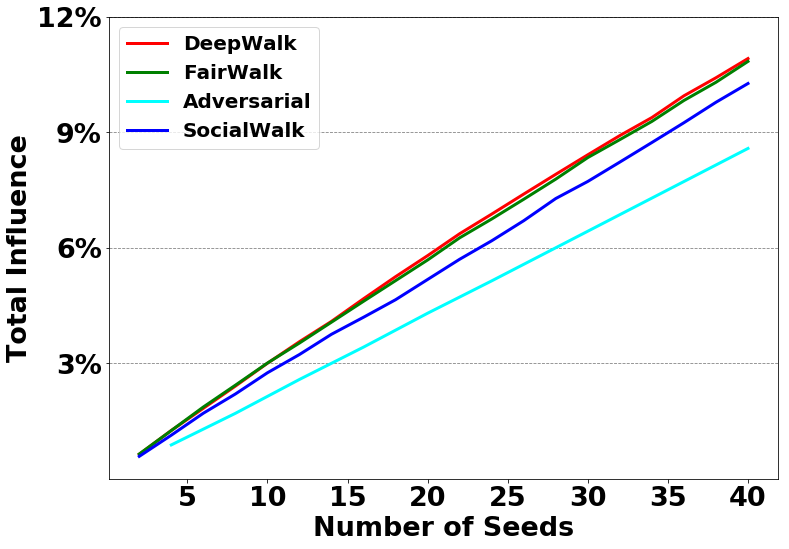

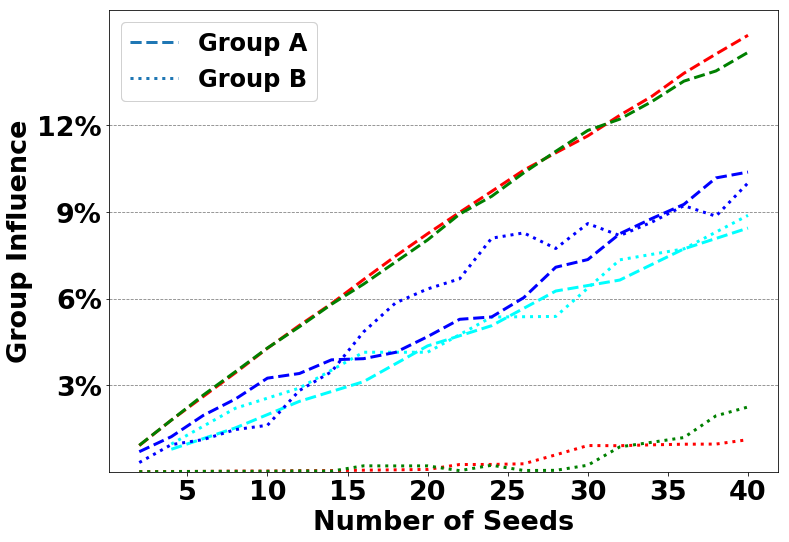

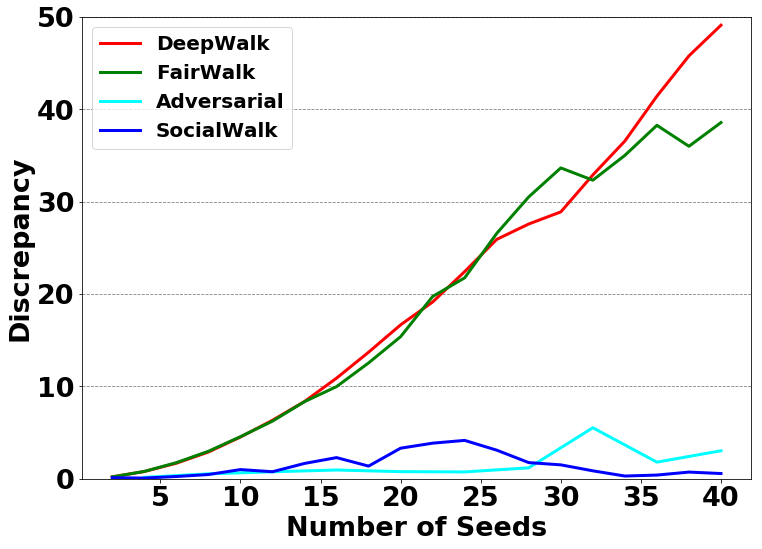

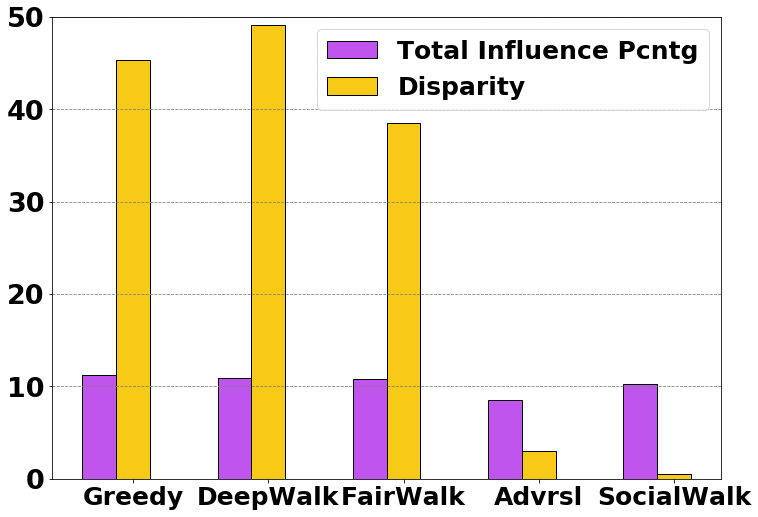

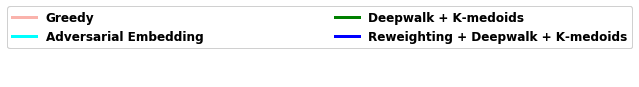

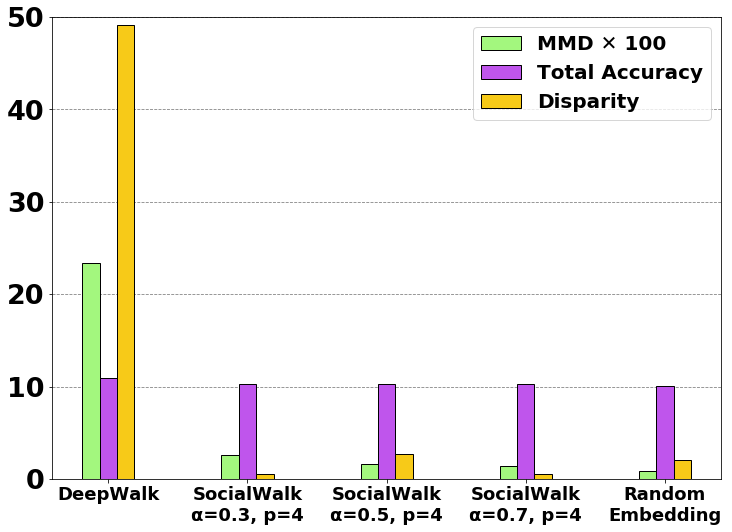

In [11]:
# Plotting the square plots
# Real Plots

label_size = 27
font_size = 24
image_size = (12, 8.5)
line_width = 3
square = True
bar_width = 0.5
# y_lim = 0.3

get_real_plots(figtype='total', square=square, fontsize=font_size, labelsize=label_size, imagesize=image_size, line_width=line_width, ylim=12, legend_size = 20)
get_real_plots(figtype='frac', square=square, fontsize=font_size, labelsize=label_size, imagesize=image_size, line_width=line_width, ylim=16, legend_size = 20)
# get_diff_plot(real=True, square=square, fontsize=font_size, labelsize=label_size, imagesize=image_size, line_width=line_width, ylim=0.16)
get_var_plot(real=True, square=square, fontsize=font_size, labelsize=label_size, imagesize=image_size, line_width=line_width, ylim=50, legend_size=20)
get_bar_plot(real=True, bar_width=bar_width, square=square, fontsize=font_size, labelsize=label_size, imagesize=image_size, ylim=50, legend_size=25)
get_legend()

image_size = (12, 8.5)
y_lim = [0, 50]
legend_size = 20
get_mmd_plot(real=True, bar_width=bar_width, fontsize=font_size, labelsize=label_size, imagesize=image_size, ylim=y_lim, legend_size=legend_size)

In [12]:
(38.551117433106484 - 0.5696656199546648) / 38.551117433106484



0.9852231100449127